<h4>Problem Statment: Using Data Available from Restaurants, Predict the Only Order Delivery Time Based on certain Factors

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd

<h4>Reading the data

In [ ]:
data = pd.read_excel("Data_Train.xlsx")

In [ ]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [ ]:
data.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [ ]:
data.shape

(11094, 9)

In [ ]:
data[['Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8']] = np.nan

In [ ]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data[['Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8']] = data.Cuisines.str.split(', ',expand=True) 

In [ ]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,Ice Cream,Desserts,None,None,None,None,None,None
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,Italian,Street Food,Fast Food,None,None,None,None,None
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,Mughlai,North Indian,Chinese,None,None,None,None,None
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,Cafe,Beverages,None,None,None,None,None,None


In [ ]:
data.drop(columns=['Cuisines'], axis=1, inplace=True)

<h4>Label Encoding for Location variable for ML model

In [ ]:
location_dict = {}
for i,location in zip(range(len(data['Location'].unique())), data['Location'].unique()):
    location_dict[location] = i

In [ ]:
data.replace(location_dict, inplace=True)

Label Encoding for Cuisine variables for ML model

In [ ]:
cuisine_dict = {}
for i,cuisine in zip(range(len(data['Cuisine_1'].unique())), data['Cuisine_1'].unique()):
    cuisine_dict[cuisine] = i
data.replace(cuisine_dict, inplace=True)

In [ ]:
strs = list(set([elm for elm in data['Cuisine_2'] if isinstance(elm, str)]))

In [ ]:
for i,cuisine in zip(range(85, len(strs)+85), strs):
    cuisine_dict[cuisine] = i
data.replace(cuisine_dict, inplace=True)

In [ ]:
strs_3 = list(set([elm for elm in data['Cuisine_3'] if isinstance(elm, str)]))
for i,cuisine in zip(range(94, len(strs_3)+94), strs_3):
    cuisine_dict[cuisine] = i
data.replace(cuisine_dict, inplace=True)

In [ ]:
strs_4 = ['Greek', 'Israeli','Poké', 'Sri Lankan']
for i,cuisine in zip(range(97, len(strs_4)+97), strs_4):
    cuisine_dict[cuisine] = i
data.replace(cuisine_dict, inplace=True)
data.fillna(-1, inplace=True)
data.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_6321,0,₹200,₹50,3.5,12,4,30 minutes,0,20.0,10.0,34.0,44.0,-1.0,-1.0,-1.0
1,ID_2882,1,₹100,₹50,3.5,11,4,30 minutes,1,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,ID_1595,2,₹150,₹50,3.6,99,30,65 minutes,2,16.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_5929,3,₹250,₹99,3.7,176,95,30 minutes,3,9.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,ID_6123,4,₹200,₹99,3.2,521,235,65 minutes,4,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
data.describe()

,Location,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
count,11094.000000,11094.000000,11094.000000,11094.000000,11094.000000,11094.00000,11094.000000,11094.000000,11094.000000
mean,12.654318,11.453398,8.530918,4.738597,1.902470,0.24671,-0.490896,-0.780332,-0.940058
std,8.725133,11.452147,13.795694,12.724940,9.951512,6.75014,4.828610,3.160619,1.155499
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000
25%,5.000000,6.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000
50%,12.000000,9.000000,6.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000
75%,18.000000,13.000000,9.000000,6.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000
max,34.000000,84.000000,93.000000,96.000000,99.000000,98.00000,100.000000,88.000000,51.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     11094 non-null  object 
 1   Location       11094 non-null  int64  
 2   Average_Cost   11094 non-null  object 
 3   Minimum_Order  11094 non-null  object 
 4   Rating         11094 non-null  object 
 5   Votes          11094 non-null  object 
 6   Reviews        11094 non-null  object 
 7   Delivery_Time  11094 non-null  object 
 8   Cuisine_1      11094 non-null  int64  
 9   Cuisine_2      11094 non-null  float64
 10  Cuisine_3      11094 non-null  float64
 11  Cuisine_4      11094 non-null  float64
 12  Cuisine_5      11094 non-null  float64
 13  Cuisine_6      11094 non-null  float64
 14  Cuisine_7      11094 non-null  float64
 15  Cuisine_8      11094 non-null  float64
dtypes: float64(7), int64(2), object(7)
memory usage: 1.4+ MB


<h3>Removing 'minutes' in Delivery Time column

In [ ]:
data['Delivery_Time'] = data['Delivery_Time'].str.replace(r'\D', '').astype(int)

In [ ]:
data.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_6321,0,₹200,₹50,3.5,12,4,30,0,20.0,10.0,34.0,44.0,-1.0,-1.0,-1.0
1,ID_2882,1,₹100,₹50,3.5,11,4,30,1,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,ID_1595,2,₹150,₹50,3.6,99,30,65,2,16.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_5929,3,₹250,₹99,3.7,176,95,30,3,9.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,ID_6123,4,₹200,₹99,3.2,521,235,65,4,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<h3>Removing rupees symbol in cost variables

In [ ]:
data['Average_Cost'] = data['Average_Cost'].str.replace(r'\D', '')
data['Minimum_Order'] = data['Minimum_Order'].str.replace(r'\D', '')

In [ ]:
data.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_6321,0,200,50,3.5,12,4,30,0,20.0,10.0,34.0,44.0,-1.0,-1.0,-1.0
1,ID_2882,1,100,50,3.5,11,4,30,1,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,ID_1595,2,150,50,3.6,99,30,65,2,16.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_5929,3,250,99,3.7,176,95,30,3,9.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,ID_6123,4,200,99,3.2,521,235,65,4,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<h3>Plotting Graphs

In [ ]:
import matplotlib.pyplot as plt

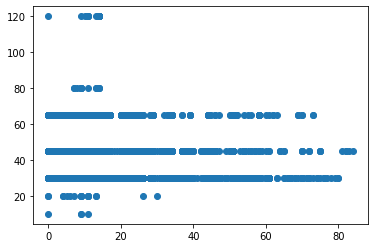

In [ ]:
plt.scatter(data['Cuisine_1'],data['Delivery_Time'])

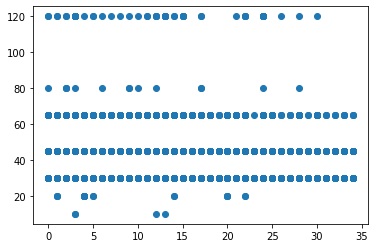

In [ ]:
plt.scatter(data['Location'],data['Delivery_Time'])

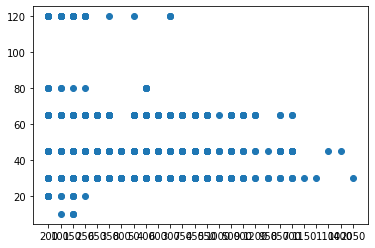

In [ ]:
plt.scatter(data['Average_Cost'],data['Delivery_Time'])

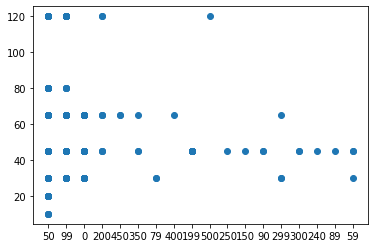

In [ ]:
plt.scatter(data['Minimum_Order'],data['Delivery_Time'])

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.to_csv("new_data.csv", index=False)

In [ ]:
new_data = pd.read_csv('new_data.csv')

In [ ]:
new_data.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_2728,7,200.0,50,3.1,7,-,30,9,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,ID_8353,6,250.0,99,4.0,498,272,45,4,34.0,11.0,7.0,25.0,2.0,13.0,17.0
2,ID_6937,15,200.0,50,-,-,-,45,9,7.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_6721,7,150.0,50,NEW,-,-,30,9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,ID_8087,14,600.0,99,4.2,3782,1948,30,7,50.0,15.0,69.0,84.0,100.0,88.0,-1.0


In [ ]:
new_data['Average_Cost'].fillna(0,inplace=True)
new_data['Average_Cost'].replace(0, sum(new_data['Average_Cost'])/len(new_data['Average_Cost']), inplace=True)

<h3>Linear Regression for predicting delivery time

In [ ]:
#Importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

predictor = np.asanyarray(new_data[['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6',\
                  'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']])
target = np.asanyarray(new_data['Delivery_Time'])

#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=42)

#Modeling
lr = LinearRegression()

#Training the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Prediction on training data
train_pred = lr.predict(X_train)
print('Mean Absolute Percentage Error on training data:',np.mean(np.abs((y_train - train_pred) / y_train)) * 100)

#Prediction on validation data
y_pred = lr.predict(X_test)
print('Mean Absolute Percentage Error on testing data:',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

Mean Absolute Percentage Error on training data: 21.903763302403163
Mean Absolute Percentage Error on testing data: 22.19167864792981


<h3>Looking at the values for MAPE, linear regression isn't the best model for predicting delivery time. It is preferred to make a neural network

<h3>Cleaning test data

In [ ]:
test_df1 = pd.read_excel('Data_Test.xlsx')
test_df1.replace(location_dict, inplace=True)
test_df1['Average_Cost'] = test_df1['Average_Cost'].str.replace(r'\D', '')
test_df1['Minimum_Order'] = test_df1['Minimum_Order'].str.replace(r'\D', '')
test_df1[['Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8']] = test_df1.Cuisines.str.split(', ',expand=True) 
test_df1.replace(cuisine_dict, inplace=True)
test_df1.fillna(-1, inplace=True)
test_df1.drop(columns=['Cuisines'], inplace=True)
test_df1.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_2842,14,350,50,4.2,361,225,9,7.0,81.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,ID_730,14,100,50,NEW,-,-,11,61.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,ID_4620,3,100,50,3.6,36,16,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_5470,27,200,50,3.6,66,33,8,9.0,7.0,0.0,5.0,-1.0,-1.0,-1.0
4,ID_3249,3,150,50,2.9,38,14,7,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<h3>Making predictions and fitting it into test data

In [ ]:
predictor = np.asanyarray(test_df1[['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6',\
                  'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']])
test_df1['Delivery_Time'] = lr.predict(predictor)
test_df1.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8,Delivery_Time
0,ID_2842,14,350,50,4.2,361,225,9,7.0,81.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.057053
1,ID_730,14,100,50,NEW,-,-,11,61.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,36.344969
2,ID_4620,3,100,50,3.6,36,16,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,34.813485
3,ID_5470,27,200,50,3.6,66,33,8,9.0,7.0,0.0,5.0,-1.0,-1.0,-1.0,36.820452
4,ID_3249,3,150,50,2.9,38,14,7,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.436029


<h3>Preparing for classification

In [ ]:
new_data['Delivery_Time'].unique()

array([ 30,  45,  65,  20, 120,  80,  10])

In [ ]:
encode = {'Delivery_Time': {10:0, 20:1, 30:2, 45:3, 65:4, 80:5, 120:6}}
new_data = new_data.replace(encode)
new_data.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_2728,7,200.0,50,3.1,7,-,2,9,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,ID_8353,6,250.0,99,4.0,498,272,3,4,34.0,11.0,7.0,25.0,2.0,13.0,17.0
2,ID_6937,15,200.0,50,-,-,-,3,9,7.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_6721,7,150.0,50,NEW,-,-,2,9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,ID_8087,14,600.0,99,4.2,3782,1948,2,7,50.0,15.0,69.0,84.0,100.0,88.0,-1.0


<h3>Classification models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import classification_report


def classifier(model, data, X, y):
    X_train, X_test, y_train, y_test = train_test_split(data[X], data[y], test_size=0.3, random_state=42)
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    print(train_pred)
    train_accuracy = metrics.accuracy_score(train_pred,y_train)
    print('Accuracy on training data is: %s' % '{0:.3%}'.format(train_accuracy))
    test_pred = model.predict(X_test)
    print('\n',test_pred)
    test_accuracy = metrics.accuracy_score(test_pred, y_test)
    print('Accuracy on testing data is: %s' % '{0:.3%}'.format(test_accuracy))


<h3>Logistic Regression

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', \
                 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_lr =LogisticRegression()
classifier(model_lr, new_data,predictor_var,outcome_var)

[2 2 2 ... 2 2 2]
Accuracy on training data is: 66.941%

 [2 3 2 ... 2 2 3]
Accuracy on testing data is: 66.416%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<h3>Gaussian Naive Bayes

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', \
                 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_nb = GaussianNB() 
classifier(model_nb, new_data,predictor_var,outcome_var)

[1 2 0 ... 1 1 0]
Accuracy on training data is: 3.902%

 [6 5 1 ... 1 1 5]
Accuracy on testing data is: 3.905%


<h3>KNN Classifier

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', \
                 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_knn = KNeighborsClassifier(n_neighbors=1)
classifier(model_knn, new_data,predictor_var,outcome_var)

[2 2 2 ... 2 2 2]
Accuracy on training data is: 90.547%

 [3 4 2 ... 2 2 2]
Accuracy on testing data is: 59.417%


<h3>Support Vector Machine

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', \
                 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_svc = SVC(kernel='rbf', C=1, gamma=1) 
classifier(model_svc, new_data,predictor_var,outcome_var)

[2 2 2 ... 2 2 2]
Accuracy on training data is: 91.075%

 [3 2 2 ... 2 2 2]
Accuracy on testing data is: 65.605%


<h3>Gradient Boosting Classifier

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', \
                 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
classifier(model_gb, new_data,predictor_var,outcome_var)

[2 2 2 ... 2 2 2]
Accuracy on training data is: 80.296%

 [3 3 2 ... 2 2 3]
Accuracy on testing data is: 70.412%


<h3>Decision Tree

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', \
                 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_dt = DecisionTreeClassifier(criterion='gini')
classifier(model_dt, new_data,predictor_var,outcome_var)

[2 2 2 ... 2 2 2]
Accuracy on training data is: 92.363%

 [3 4 2 ... 2 2 2]
Accuracy on testing data is: 62.571%


<h3>Random Forest

In [ ]:
outcome_var='Delivery_Time'
predictor_var = ['Location','Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', \
                 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
classifier(model_rfc, new_data,predictor_var,outcome_var)

[2 2 2 ... 2 2 2]
Accuracy on training data is: 92.350%

 [3 4 2 ... 2 2 3]
Accuracy on testing data is: 67.918%


<h4>Here we saw that Gradient Boosting Classifier gives best testing accuracy so we will be using that for test data

In [ ]:
test_df = pd.read_excel('Data_Test.xlsx')
test_df.replace(location_dict, inplace=True)
test_df['Average_Cost'] = test_df['Average_Cost'].str.replace(r'\D', '')
test_df['Minimum_Order'] = test_df['Minimum_Order'].str.replace(r'\D', '')
test_df[['Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8']] = test_df.Cuisines.str.split(', ',expand=True) 
test_df.replace(cuisine_dict, inplace=True)
test_df.fillna(-1, inplace=True)
test_df.drop(columns=['Cuisines'], inplace=True)
test_df.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,ID_2842,14,350,50,4.2,361,225,9,7.0,81.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,ID_730,14,100,50,NEW,-,-,11,61.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,ID_4620,3,100,50,3.6,36,16,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,ID_5470,27,200,50,3.6,66,33,8,9.0,7.0,0.0,5.0,-1.0,-1.0,-1.0
4,ID_3249,3,150,50,2.9,38,14,7,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<h3>Prediction and adding it to the data

In [ ]:
predictor_var = ['Location', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Minimum_Order', 'Average_Cost']
prediction = model_gb.predict(test_df[predictor_var])

minutes = []
for i in prediction:
    minutes.append(list(encode['Delivery_Time'].keys())[list(encode['Delivery_Time'].values()).index(i)])

test_df['Delivery_Time'] = minutes
test_df.head()

,Restaurant,Location,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8,Delivery_Time
0,ID_2842,14,350,50,4.2,361,225,9,7.0,81.0,-1.0,-1.0,-1.0,-1.0,-1.0,30
1,ID_730,14,100,50,NEW,-,-,11,61.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,30
2,ID_4620,3,100,50,3.6,36,16,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,30
3,ID_5470,27,200,50,3.6,66,33,8,9.0,7.0,0.0,5.0,-1.0,-1.0,-1.0,30
4,ID_3249,3,150,50,2.9,38,14,7,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,30


<h4>Looking at this, we can convert the problem statement to classification problem as the values in our target variable is discrete and it might work better than our regression model but if we used neural network, it would give better results